In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import wget
import os
# Dependencies: wget, xlrd

# Getting hold of and cleaning up income data for the UK

In this post I will be downloading data from the HMRC on income in the UK. The data provides the mean
and median income before and after tax split by age and gender. You can see the original data sources:

* [For the last few years on the www.gov.uk site](https://www.gov.uk/government/statistics/distribution-of-median-and-mean-income-and-tax-by-age-range-and-gender-2010-to-2011)

and 

* [For the years (1999-2010) on the national achive](http://webarchive.nationalarchives.gov.uk/20120405152450/http://hmrc.gov.uk/stats/income_distribution/menu-by-year.html)

The data is several `xls` files. These have no standard naming convention, so we will need to download them on a somewhat adhoc bases. Let's do this first, saving them to a local dir with names `year-range.xls`.

In [1]:
data_dir = "./DataIncomeInvestigation"
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

## Downlading the data

### From 1999 to 2009

In [2]:
file_names_1999_2009 = [  
"table3_2_september04.xls",
"table3-2-2000-01.xls",
"table-32-2001-02.xls",
"table3_2.xls",
"3_2_apr06.xls",
"table3-2-2004-05.xls",
"table3-2-jan08.xls",
"3-2tabledec08.xls",
"3-2table-jan2010.xls",
"",
"3-2table-feb2012.xls"]

years_1999_2009 = ["{}-{}".format(i, i+1) for i in range(1999, 2010)]

url_base = "http://webarchive.nationalarchives.gov.uk/20120405152450/http://hmrc.gov.uk/stats/income_distribution/{}"

for file, year in zip(file_names_1999_2009, years_1999_2009):
    fname = wget.download(url_base.format(file), 
                          out="{}/{}.xls".format(data_dir, year))
    
    print "Downloaded {} for year {} to {}".format(file, year, fname) 

### From 2010 to 2013

In [ ]:
url_list_2010_2013 = ['https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/267112/table3-2-1.xls',
            'https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/276222/table3-2-12.xls',
            'https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/399053/Table_3_2_13.xls']

years_2010_2013 = ['2010-2011', '2011-2012', '2012-2013']

for url, year in zip(url_list_2010_2013, years_2010_2013):
    fname = wget.download(url, out="{}/{}.xls".format(data_dir, year))
    print "Downloaded {} \nfor year {} to {}".format(url, year, fname) 

## Importing the data

Okay, now that we have downloaded the data we will import it. Unfortunately although all
the spreadsheets are in a *similar* format, they are not exactly the same. To simplify the
process then we will first construct some helper functions. The general principle will be 
to read each spreadsheet as a dataframe, sanitise it, then add it to a total dataframe `df`. 
Each spreadsheet will have the data in a slightly different place, we we will, by hand,
set the row and columns of interest and check that the correct data is imported:

Note: For now we restrict our focus to the total data and ignore the gender split.

In [2]:
years = ["{}-{}".format(i, i+1) for i in range(1999, 2013)]

def ReadData(file_name, **kwargs):
    """ Read in the data and print it for checking """
    print("Reading in data from {}".format(file_name))
    df = pd.read_excel(file_name, 
                       index_col=None,
                       header=None, 
                       names=['age', 
                              'Number', 
                              'MedianIncomeBeforeTax', 
                              'MeanIncomeBeforetax'],
                       **kwargs)    
    return df

def RecordData(year, df=None, **kwargs):
    """ Helper function to add the data for year to a data frame df """
    if type(df) != pd.core.frame.DataFrame:
        df = pd.DataFrame()
    file_name = "{}/{}.xls".format(data_dir, year)
    
    dfNew = ReadData(file_name, **kwargs)
    dfNew.dropna(inplace=True)
    dfNew['year'] = year
    print "Adding the following data to the frame:"
    print(dfNew)
    return df.append(dfNew, ignore_index=True)

In [3]:
i = 0
df = RecordData(years[i], skiprows=68, skip_footer=12, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/1999-2000.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     542                   6920                 7860  1999-2000
1         20-24    1940                   9940                11300  1999-2000
2         25-29    2910                  14300                16500  1999-2000
3         30-34    3180                  16700                20500  1999-2000
4         35-39    3200                  17200                22500  1999-2000
5         40-44    2840                  17200                23600  1999-2000
6         45-49    2660                  17300                24200  1999-2000
7         50-54    2760                  16400                23300  1999-2000
8         55-59    2020                  14500                21300  1999-2000
9         60-64    1540                  11800                17600  1999-2000
10        65-69    1160       

In [4]:
i = 1
df = RecordData(years[i], df=df, skiprows=68, skip_footer=10, parse_cols=[0, 2, 4, 9])

Reading in data from ./DataIncomeInvestigation/2000-2001.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     592                   7300                 8170  2000-2001
1         20-24    2120                  10500                11800  2000-2001
2         25-29    3000                  15200                17700  2000-2001
3         30-34    3430                  17200                21500  2000-2001
4         35-39    3400                  18100                24100  2000-2001
5         40-44    3110                  17800                25100  2000-2001
6         45-49    2780                  18000                25000  2000-2001
7         50-54    2920                  16800                23900  2000-2001
8         55-59    2250                  14500                21200  2000-2001
9         60-64    1730                  11800                16900  2000-2001
10        65-69    1320       

In [5]:
df = RecordData(years[2], df=df, skiprows=68, skip_footer=11, parse_cols=[0, 2, 4, 9])

Reading in data from ./DataIncomeInvestigation/2001-2002.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     544                   7590                 8720  2001-2002
1         20-24    2060                  11500                12800  2001-2002
2         25-29    2650                  16200                18800  2001-2002
3         30-34    3160                  18400                22900  2001-2002
4         35-39    3320                  18700                25500  2001-2002
5         40-44    3170                  19000                26500  2001-2002
6         45-49    2780                  18900                26200  2001-2002
7         50-54    2750                  17500                24800  2001-2002
8         55-59    2420                  15500                22500  2001-2002
9         60-64    1680                  12400                17800  2001-2002
10        65-69    1380       

In [6]:
df = RecordData(years[3], df=df, skiprows=68, skip_footer=12, parse_cols=[0, 1, 2, 4])

Reading in data from ./DataIncomeInvestigation/2002-2003.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     553                   7810                 8790  2002-2003
1         20-24    2060                  11500                12700  2002-2003
2         25-29    2600                  16500                19000  2002-2003
3         30-34    3080                  18800                23100  2002-2003
4         35-39    3320                  19400                25600  2002-2003
5         40-44    3190                  19300                26600  2002-2003
6         45-49    2860                  19300                26700  2002-2003
7         50-54    2720                  18000                25100  2002-2003
8         55-59    2550                  15700                22900  2002-2003
9         60-64    1780                  12700                18300  2002-2003
10        65-69    1420       

In [7]:
df = RecordData(years[4], df=df, skiprows=14, skip_footer=65, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2003-2004.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     532                   7820                 8950  2003-2004
1         20-24    2040                  11500                12700  2003-2004
2         25-29    2520                  16400                18700  2003-2004
3         30-34    3020                  18700                22900  2003-2004
4         35-39    4010                  19200                25400  2003-2004
5         40-44    2530                  19300                27000  2003-2004
6         45-49    2870                  19500                27100  2003-2004
7         50-54    2660                  18700                25800  2003-2004
8         55-59    2540                  16200                23500  2003-2004
9         60-64    1810                  13000                19000  2003-2004
10        65-69    1400       

In [8]:
df = RecordData(years[5], df=df, skiprows=14, skip_footer=65, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2004-2005.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     643                   8130                 9570  2004-2005
1         20-24    2270                  11800                13200  2004-2005
2         25-29    2790                  17000                19300  2004-2005
3         30-34    3090                  19500                23900  2004-2005
4         35-39    3410                  20100                26800  2004-2005
5         40-44    3420                  20200                28100  2004-2005
6         45-49    3000                  20300                28600  2004-2005
7         50-54    2730                  19300                27000  2004-2005
8         55-59    2670                  17200                24500  2004-2005
9         60-64    2010                  13600                20000  2004-2005
10        65-69    1520       

In [9]:
df = RecordData(years[6], df=df, skiprows=14, skip_footer=65, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2005-2006.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     555                   8300                 9440  2005-2006
1         20-24    2280                  12200                13400  2005-2006
2         25-29    2980                  17400                20100  2005-2006
3         30-34    3030                  20400                25600  2005-2006
4         35-39    3450                  20900                28500  2005-2006
5         40-44    3580                  21100                30100  2005-2006
6         45-49    3200                  20800                30600  2005-2006
7         50-54    2800                  20200                29100  2005-2006
8         55-59    2850                  17800                26100  2005-2006
9         60-64    2180                  14400                21500  2005-2006
10        65-69    1490       

In [10]:
df = RecordData(years[7], df=df, skiprows=14, skip_footer=65, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2006-2007.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     531                   8550                 9840  2006-2007
1         20-24    2350                  12600                13900  2006-2007
2         25-29    3070                  17800                20900  2006-2007
3         30-34    2940                  20800                26600  2006-2007
4         35-39    3380                  21700                29900  2006-2007
5         40-44    3600                  21600                31700  2006-2007
6         45-49    3330                  21500                32000  2006-2007
7         50-54    2820                  21100                31000  2006-2007
8         55-59    2790                  19200                27700  2006-2007
9         60-64    2470                  16000                23100  2006-2007
10        65-69    1580       

In [11]:
df = RecordData(years[8], df=df, skiprows=14, skip_footer=66, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2007-2008.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     549                   8800                10900  2007-2008
1         20-24    2360                  13000                14500  2007-2008
2         25-29    3210                  18500                21600  2007-2008
3         30-34    2990                  21400                27800  2007-2008
4         35-39    3360                  22700                31600  2007-2008
5         40-44    3600                  22600                33300  2007-2008
6         45-49    3410                  22500                34000  2007-2008
7         50-54    2900                  22100                32800  2007-2008
8         55-59    2710                  20400                29300  2007-2008
9         60-64    2590                  17100                24900  2007-2008
10        65-69    1640       

In [12]:
# THE DATA FOR 2008-2009 DOES NOT EXIST: So we create Nans
df_2008_2009 = df[df.year=='2007-2008'].copy()
df_2008_2009.set_value(df_2008_2009.index, 
                       ['Number', 'MedianIncomeBeforeTax', 'MeanIncomeBeforetax'],
                       np.nan)
df_2008_2009['year'] = years[9]
df = df.append(df_2008_2009, ignore_index=True)


In [13]:
df = RecordData(years[10], df=df, skiprows=14, skip_footer=109, parse_cols=[0, 2, 3, 5],
                sheetname="3.2")

Reading in data from ./DataIncomeInvestigation/2009-2010.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     321                   9800                11600  2009-2010
1         20-24    2090                  13700                15500  2009-2010
2         25-29    2970                  18900                22100  2009-2010
3         30-34    2900                  22400                28400  2009-2010
4         35-39    3030                  23500                32700  2009-2010
5         40-44    3360                  23300                34700  2009-2010
6         45-49    3410                  23200                35300  2009-2010
7         50-54    2920                  22900                34500  2009-2010
8         55-59    2490                  21300                31400  2009-2010
9         60-64    2550                  18300                26300  2009-2010
10        65-69    1580       

In [14]:
df = RecordData(years[11], df=df, skiprows=14, skip_footer=106, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2010-2011.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     310                   9550                10800  2010-2011
1         20-24    2140                  13400                15000  2010-2011
2         25-29    3030                  18700                21700  2010-2011
3         30-34    3000                  22300                27800  2010-2011
4         35-39    2980                  23600                32000  2010-2011
5         40-44    3360                  23400                33500  2010-2011
6         45-49    3430                  23300                34000  2010-2011
7         50-54    3010                  22800                32900  2010-2011
8         55-59    2520                  21500                30400  2010-2011
9         60-64    2610                  18200                25100  2010-2011
10        65-69    1670       

In [15]:
df = RecordData(years[12], df=df, skiprows=14, skip_footer=101, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2011-2012.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     242                  10300                11800  2011-2012
1         20-24    1960                  14000                15800  2011-2012
2         25-29    2980                  19100                22300  2011-2012
3         30-34    2980                  23000                28700  2011-2012
4         35-39    2860                  24700                33000  2011-2012
5         40-44    3280                  24400                35200  2011-2012
6         45-49    3420                  24000                35500  2011-2012
7         50-54    3040                  23900                35000  2011-2012
8         55-59    2510                  22300                32300  2011-2012
9         60-64    2400                  19500                27000  2011-2012
10        65-69    1820       

In [16]:
df = RecordData(years[13], df=df, skiprows=14, skip_footer=101, parse_cols=[0, 2, 3, 5])

Reading in data from ./DataIncomeInvestigation/2012-2013.xls
Adding the following data to the frame:
            age  Number  MedianIncomeBeforeTax  MeanIncomeBeforetax       year
0      Under 20     208                  11200                12700  2012-2013
1         20-24    1860                  14500                16400  2012-2013
2         25-29    2930                  19300                22700  2012-2013
3         30-34    2990                  23400                28900  2012-2013
4         35-39    2760                  25000                33600  2012-2013
5         40-44    3180                  25100                35600  2012-2013
6         45-49    3370                  25000                36500  2012-2013
7         50-54    3050                  24500                35800  2012-2013
8         55-59    2520                  23200                33400  2012-2013
9         60-64    2330                  20400                28100  2012-2013
10        65-69    1940       

## Checking the data

We now drop all all duplicates: these should only come 
repeated calls to `RecordData`. But
we can sanity check later by plotting.

In [17]:
df = df.drop_duplicates()
df

,age,Number,MedianIncomeBeforeTax,MeanIncomeBeforetax,year
0,Under 20,542,6920,7860,1999-2000
1,20-24,1940,9940,11300,1999-2000
2,25-29,2910,14300,16500,1999-2000
3,30-34,3180,16700,20500,1999-2000
4,35-39,3200,17200,22500,1999-2000
5,40-44,2840,17200,23600,1999-2000
6,45-49,2660,17300,24200,1999-2000
7,50-54,2760,16400,23300,1999-2000
8,55-59,2020,14500,21300,1999-2000
9,60-64,1540,11800,17600,1999-2000


## Plotting the data

### Income against time by age

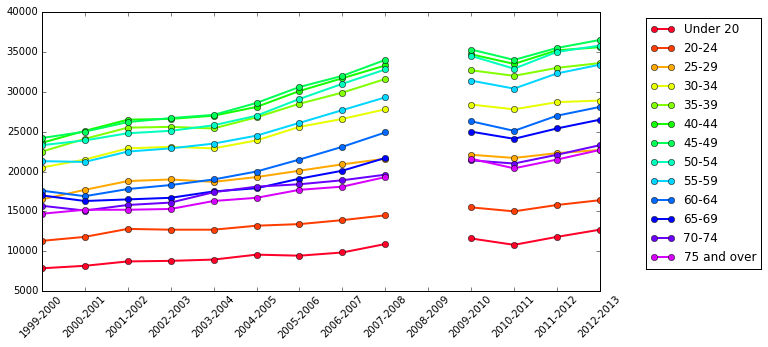

In [22]:
years_total_val = [int(s.split("-")[0]) for s in years]

age_ranges = df[df.year == '1999-2000'].age.values

fig, ax = plt.subplots(figsize=(10, 5))
NUM_COLORS = len(age_ranges)
cm = plt.get_cmap('gist_rainbow')
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for age in age_ranges:
    ax.plot(years_total_val, df[df.age == age]['MeanIncomeBeforetax'], "-o", 
            lw=2, label=age)
    ax.set_xticks(years_total_val)
    ax.set_xticklabels(years, rotation=45)

plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

### Income distribution as a function of time

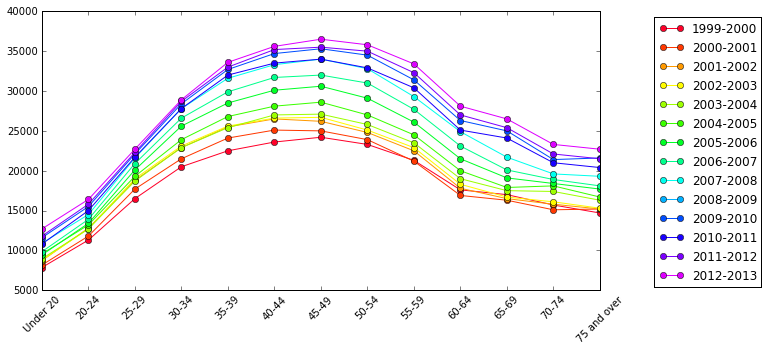

In [27]:
age_ranges_values = range(len(age_ranges))

fig, ax = plt.subplots(figsize=(10, 5))
NUM_COLORS = len(years)
cm = plt.get_cmap('gist_rainbow')
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for yr in years:
    ax.plot(age_ranges_values, df[df.year == yr]['MeanIncomeBeforetax'], "-o",
            label=yr)
    
ax.set_xticks(age_ranges_values)
ax.set_xticklabels(age_ranges, rotation=45)
plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()